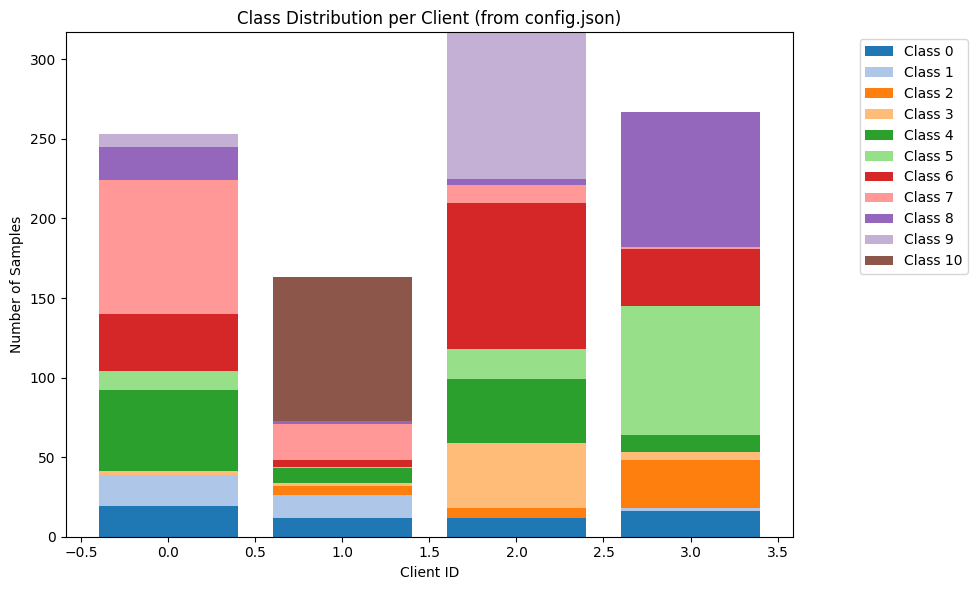

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ujson as json  # use 'import json' if ujson is not available

# Load the config
config_path = "organamnist4/config.json"  # update if different
with open(config_path, 'r') as f:
    config = json.load(f)

client_stats_raw = config["Size of samples for labels in clients"]

# Parse it into {client_id: {class_id: count}} format
client_stats = {}
for i, class_list in enumerate(client_stats_raw):
    class_dict = {cls_id: count for cls_id, count in class_list}
    client_stats[i] = class_dict

# Extract all unique class labels
all_classes = sorted(set(cls for client in client_stats.values() for cls in client))
num_clients = len(client_stats)

# Build class-client matrix
class_counts = []
for cls in all_classes:
    class_counts.append([client_stats[c].get(cls, 0) for c in range(num_clients)])

class_counts = np.array(class_counts)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(num_clients)

colors = plt.cm.tab20.colors  # Up to 20 colors
for i, cls in enumerate(all_classes):
    ax.bar(range(num_clients), class_counts[i], bottom=bottom, label=f'Class {cls}', color=colors[i % 20])
    bottom += class_counts[i]

ax.set_xlabel("Client ID")
ax.set_ylabel("Number of Samples")
ax.set_title("Class Distribution per Client (from config.json)")
ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.0))
plt.tight_layout()
plt.show()
